# FlowKit Tutorial

## Classes

* Sample
* GatingStrategy

## Requirements

* flowio
* flowutils
* matplotlib
* scipy
* seaborn
* pandas
* numpy
* lxml
* bokeh
* anytree

## Not Implemented (yet...)

* Mixed channel compensation

## References

*Bagwell CB. Hyperlog-a flexible log-like transform for negative, zero,
and positive valued data. Cytometry A., 2005:64(1):34–42.*

*Parks DR, Roederer M, Moore WA. A new “Logicle” display method avoids deceptive effects of logarithmic scaling for low signals and compensated data. Cytometry., 2006:69: 541-545*

*Moller T, Haines E. Ray/Polygon Intersection, Real-Time Rendering (3rd Edition), 2008*

*http://geomalgorithms.com/a03-_inclusion.html*


## Let's get started...

In [1]:
import bokeh
from bokeh.plotting import show
import matplotlib.pyplot as plt

import flowkit as fk

bokeh.io.output_notebook()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Loading BokehJS ...

### Most classes and methods have been documented: 

In [2]:
help(fk.Sample)

Help on class Sample in module flowkit.models.sample:

class Sample(builtins.object)
 |  Represents a single FCS sample from an FCS file, NumPy array or Pandas
 |  DataFrame.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fcs_path_or_data, channel_labels=None, compensation=None, subsample_count=10000, random_seed=1, filter_negative_scatter=False, filter_anomalous_events=False, null_channel_list=None)
 |      Create a Sample instance
 |      
 |      :param fcs_path_or_data: FCS data, can be either:
 |              - a file path or file handle to an FCS file
 |              - a pathlib Path object
 |              - a FlowIO FlowData object
 |              - a NumPy array of FCS event data (must provide channel_labels)
 |              - a Pandas DataFrame containing FCS event data (channel labels as headers)
 |      :param channel_labels: A list of strings or a list of tuples to use for the channel
 |          labels. Required if fcs_path_or_data is a NumPy array
 |      :param c

## Sample

A Sample object can conveniently be created in multiple ways:
    
    * A file path to an FCS file
    * A pathlib Path object to an FCS file
    * An already instantiated FlowIO FlowData object 
    * A NumPy array (provided the channel_labels argument is given)
    * A Pandas DataFrame (with channel labels as headers)

When creating a Sample instance, several optional arguments are available, including a compensation matrix, sub-sampling instructions, event filtering, and declaring null channels. Here, we'll create a Sample instance via a file path to an FCS file with no sub-sampling:

In [3]:
fcs_path = '../examples/gate_ref/data1.fcs'

In [4]:
sample = fk.Sample(fcs_path, subsample_count=None)

In [5]:
sample

Sample(v2.0, B07, 8 channels, 13367 events)

#### Get the FCS version of the file (returns None if a Sample was created from a NumPy array or Pandas DataFrame)

In [6]:
sample.version

2.0

#### Retrieve all the FCS metadata:

In [7]:
sample.get_metadata()

{'&10patient id': ' FJ#192659',
 '&11day': '35d',
 '&12sample id': 'T-cells',
 '&13analysis doc.': '',
 '&1sample': '200',
 '&2number of washes': '1',
 '&3mixing vol': '100',
 '&4number of mixes': '2',
 '&5data file prefix part #1\\\\&6data file prefix part #2\\\\&7data file prefix part #3\\\\&8acquisition doc.': 'LYMPH SUBSET ACQ',
 '&9instr. sett. file': 'E#7 Settings #1',
 'bdacqlibversion': '3.1',
 'bdlasermode': '1',
 'bdnpar': '7',
 'bdp1n': 'FSC-H',
 'bdp2n': 'SSC-H',
 'bdp3n': 'FL1-H',
 'bdp4n': 'FL2-H',
 'bdp5n': 'FL3-H',
 'bdp6n': 'FL2-A',
 'bdp7n': 'FL4-H',
 'bdword0': '24',
 'bdword1': '394',
 'bdword10': '300',
 'bdword11': '299',
 'bdword12': '551',
 'bdword13': '4',
 'bdword14': '397',
 'bdword15': '501',
 'bdword16': '481',
 'bdword17': '586',
 'bdword18': '574',
 'bdword19': '100',
 'bdword2': '492',
 'bdword20': '100',
 'bdword21': '100',
 'bdword22': '100',
 'bdword23': '1',
 'bdword24': '1',
 'bdword25': '0',
 'bdword26': '0',
 'bdword27': '0',
 'bdword28': '136',
 

#### Retrieve a dictionary of the required PnN labels & optional PnS labels for each channel. Note that Samples distinguish between channel numbers and indices, with channel numbers being indexed at 1 and channel indices being indexed at 0. The `channels` attribute yields the labels with keys as the channel numbers:

In [8]:
sample.channels

{'1': {'PnN': 'FSC-H', 'PnS': 'FSC-Height'},
 '2': {'PnN': 'SSC-H', 'PnS': 'SSC-Height'},
 '3': {'PnN': 'FL1-H', 'PnS': 'CD4 FITC'},
 '4': {'PnN': 'FL2-H', 'PnS': 'CD8 B PE'},
 '5': {'PnN': 'FL3-H', 'PnS': 'CD3 PerCP'},
 '6': {'PnN': 'FL2-A'},
 '7': {'PnN': 'FL4-H', 'PnS': 'CD8 APC'},
 '8': {'PnN': 'Time', 'PnS': 'Time (102.40 sec.)'}}

#### Or get a list of only the PnN labels:

In [9]:
sample.pnn_labels

['FSC-H', 'SSC-H', 'FL1-H', 'FL2-H', 'FL3-H', 'FL2-A', 'FL4-H', 'Time']

#### And the optional PnS labels are available too (empty values will be empty strings):

In [10]:
sample.pns_labels

['FSC-Height',
 'SSC-Height',
 'CD4 FITC',
 'CD8 B PE',
 'CD3 PerCP',
 '',
 'CD8 APC',
 'Time (102.40 sec.)']

#### A Sample knows which indices belong to fluorescent channels:

In [11]:
sample.fluoro_indices

[2, 3, 4, 5, 6]

#### Lookup a channel index by a label string:

In [12]:
sample.get_channel_index('FL2-H')

3

#### Or, lookup a channel number:

In [13]:
sample.get_channel_number_by_label('FL2-H')

4

#### And, just so you don't have to write any lookup code, you can get a channel index via its number:

In [14]:
sample.get_channel_index(4)

3

#### To get the event count:

In [15]:
sample.event_count

13367

#### Several other Sample attributes are available including: 

* `acquisition_date`
* `original_filename`
* `subsample_indices`
* `anomolous_indices`
* `compensation`

### Plotting Sample Events

* Histogram
* Contour Plot
* Interactive Scatter Plot
* Interactive Scatter Plot Matrix

For all plotting methods, the `source` argument determines whether the original events ('raw'), compensated events ('comp'), or transformed events ('xform') are displayed. Note, transformed events will be displayed post-compensation if a compensation matrix was supplied when creating a Sample instance or if the `apply_compensation` method has been called. Transformations can be applied to a non-compensated Sample.

All plotting methods return a figure of either a Seaborn or Bokeh instance. This is done so the caller can modify and/or display the plot as required.

### Histogram

In [16]:
help(sample.plot_histogram)

Help on method plot_histogram in module flowkit.models.sample:

plot_histogram(channel_label_or_number, source='xform', subsample=False, bins=None, x_min=None, x_max=None, fig_size=(15, 7)) method of flowkit.models.sample.Sample instance
    Returns a histogram plot of the specified channel events, available
    as raw, compensated, or transformed data. Plot also contains a curve
    of the gaussian kernel density estimate.
    
    :param channel_label_or_number:  A channel's PnN label or number to use
        for plotting the histogram
    :param source: 'raw', 'comp', 'xform' for whether the raw, compensated
        or transformed events are used for plotting
    :param subsample: Whether to use all events for plotting or just the
        sub-sampled events. Default is False (all events). Plotting
        sub-sampled events can be much faster.
    :param bins: Number of bins to use for the histogram. If None, the
        number of bins is determined by the Freedman-Diaconis rule.
  

In [17]:
# turn off interactive plotting, else the plots display automatically in the notebook
plt.ioff()
fig = sample.plot_histogram('FSC-H', source='raw', x_min=0)

/home/swhite/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


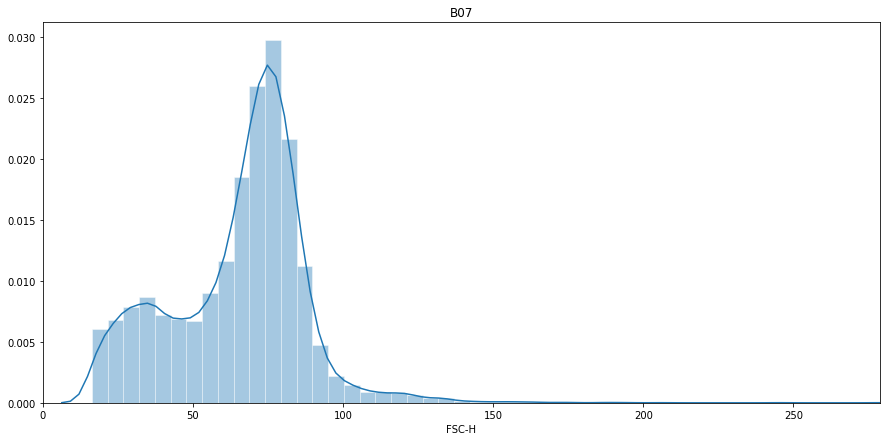

In [18]:
plt.show()

#### Changing the bin size:

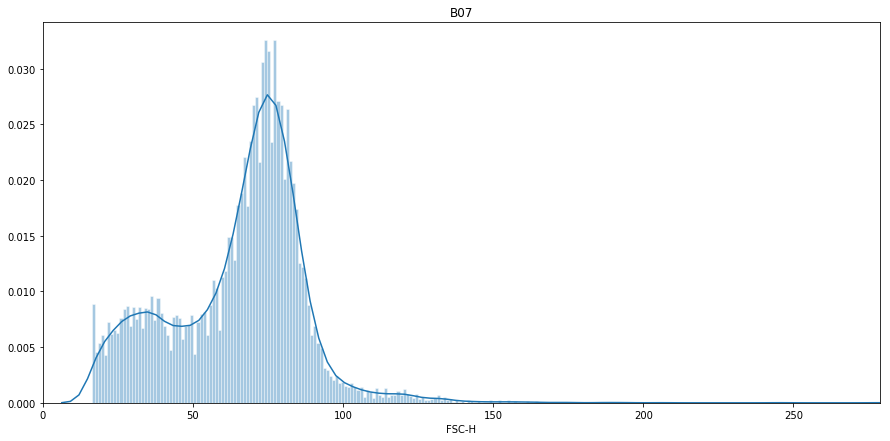

In [19]:
fig = sample.plot_histogram('FSC-H', source='raw', x_min=0, bins=256)
plt.show()

### Contour Plot

In [20]:
help(sample.plot_contour)

Help on method plot_contour in module flowkit.models.sample:

plot_contour(x_label_or_number, y_label_or_number, source='xform', subsample=False, plot_events=False, x_min=None, x_max=None, y_min=None, y_max=None, fig_size=(8, 8)) method of flowkit.models.sample.Sample instance
    Returns a contour plot of the specified channel events, available
    as raw, compensated, or transformed data.
    
    :param x_label_or_number:  A channel's PnN label or number for x-axis
        data
    :param y_label_or_number: A channel's PnN label or number for y-axis
        data
    :param source: 'raw', 'comp', 'xform' for whether the raw, compensated
        or transformed events are used for plotting
    :param subsample: Whether to use all events for plotting or just the
        sub-sampled events. Default is False (all events). Plotting
        sub-sampled events can be much faster.
    :param plot_events: Whether to display the event data points in
        addition to the contours. Default is 

In [21]:
f = sample.plot_contour('FSC-H', 'SSC-H', source='raw')

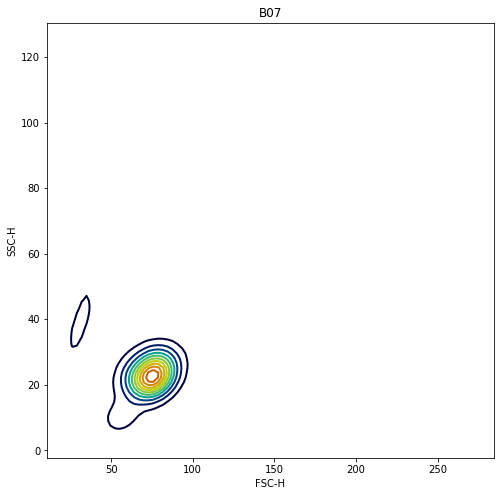

In [22]:
plt.show()

#### Adding events for a non-interactive scatter plot (but not as fast as the true scatter plot method):

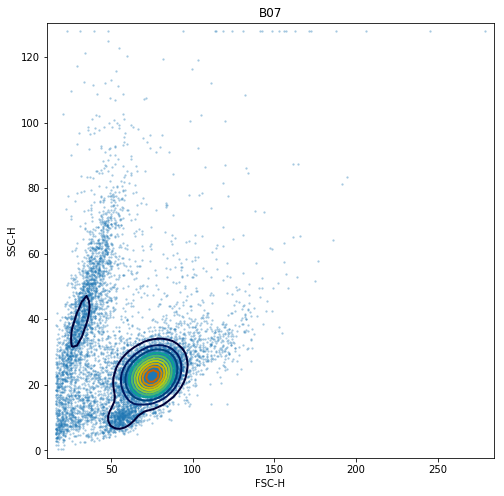

In [23]:
f = sample.plot_contour('FSC-H', 'SSC-H', source='raw', plot_events=True)
plt.show()

### Interactive Scatter Plot

In [24]:
p = sample.plot_scatter('FSC-H', 'SSC-H', source='raw')

In [25]:
show(p)

#### Turn off the color density:

In [26]:
p = sample.plot_scatter('SSC-H', 'FSC-H', source='raw', color_density=False)
show(p)

#### Apply a transform and plot fluorescent channels (raw and transformed):

In [27]:
sample.apply_asinh_transform(pre_scale=0.5)

In [28]:
p = sample.plot_scatter('FL1-H', 'FL2-H', source='raw')
show(p)

In [29]:
p = sample.plot_scatter('FL1-H', 'FL2-H', source='xform')
show(p)

### Interactive Scatterplot Matrix

In [30]:
help(sample.plot_scatter_matrix)

Help on method plot_scatter_matrix in module flowkit.models.sample:

plot_scatter_matrix(source='xform', subsample=False, channel_labels_or_numbers=None, color_density=False) method of flowkit.models.sample.Sample instance
    Returns an interactive scatter plot matrix for all channel combinations
    except for the Time channel.
    
    :param source: 'raw', 'comp', 'xform' for whether the raw, compensated
        or transformed events are used for plotting
    :param subsample: Whether to use all events for plotting or just the
        sub-sampled events. Default is False (all events). Plotting
        sub-sampled events can be much faster.
    :param channel_labels_or_numbers: List of channel PnN labels or channel
        numbers to use for the scatter plot matrix. If None, then all
        channels will be plotted (except Time).
    :param color_density: Whether to color the events by density, similar
        to a heat map. Default is False.
    :return: A Bokeh Figure object cont

In [31]:
spm = sample.plot_scatter_matrix(
    source='xform', 
    channel_labels_or_numbers=['FSC-H', 'SSC-H', 'FL3-H', 'FL4-H'],
    color_density=True)
show(spm)

## GatingStrategy

A GatingStrategy object is created from a valid GatingML document. The interface is simple as there is a single method `gate_sample` that takes a Sample instance and an optional `gate_id` text string identifying a gate. If no `gate_id` is specified the method evaluates and returns all gates in the gating strategy.

In [32]:
help(fk.GatingStrategy)

Help on class GatingStrategy in module flowkit.models.gate:

class GatingStrategy(builtins.object)
 |  Represents an entire flow cytometry gating strategy, including instructions
 |  for compensation and transformation. Takes an optional, valid GatingML
 |  document as an input.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, gating_ml_file_path)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  export_gate_hierarchy_image(self, output_file_path)
 |      Saves an image of the gate hierarchy in many common formats
 |      according to the extension given in `output_file_path`, including
 |        - SVG  ('svg')
 |        - PNG  ('png')
 |        - JPEG ('jpeg', 'jpg')
 |        - TIFF ('tiff', 'tif')
 |        - GIF  ('gif')
 |        - PS   ('ps')
 |        - PDF  ('pdf')
 |      
 |      *Requires that `graphviz` is installed.*
 |      
 |      :param output_file_path: File path (including file nam

In [33]:
gml_path = '../examples/gate_ref/gml/gml_all_gates.xml'

In [34]:
g_strat = fk.GatingStrategy(gml_path)

In [35]:
g_strat

GatingStrategy(42 gates, 9 transforms, 1 compensations)

#### Retrieve all the gates

In [36]:
g_strat.gates

{'And1': BooleanGate(And1, parent: None, type: and),
 'And2': BooleanGate(And2, parent: None, type: and),
 'And3': BooleanGate(And3, parent: None, type: and),
 'And4': BooleanGate(And4, parent: None, type: and),
 'Ellipse1': EllipsoidGate(Ellipse1, parent: None, coords: [12.99701, 16.22941]),
 'Not1': BooleanGate(Not1, parent: None, type: not),
 'Or1': BooleanGate(Or1, parent: None, type: or),
 'Or2': BooleanGate(Or2, parent: None, type: or),
 'ParAnd2': BooleanGate(ParAnd2, parent: Polygon1, type: and),
 'ParAnd3': BooleanGate(ParAnd3, parent: Range1, type: and),
 'Polygon1': PolygonGate(Polygon1, parent: None, vertices: 3),
 'Polygon2': PolygonGate(Polygon2, parent: None, vertices: 4),
 'Polygon3NS': PolygonGate(Polygon3NS, parent: None, vertices: 8),
 'Polygon4': PolygonGate(Polygon4, parent: None, vertices: 3),
 'Quadrant1': QuadrantGate(Quadrant1, parent: None, quadrants: 4),
 'Quadrant2': QuadrantGate(Quadrant2, parent: None, quadrants: 5),
 'Range1': RectangleGate(Range1, parent

#### Retrieve all the compensation matrices

In [37]:
g_strat.comp_matrices

{'MySpill': Matrix(MySpill, dims: 3)}

#### And, all the transformations

In [38]:
g_strat.transformations

{'AsinH_10000_4_1': AsinhTransform(AsinH_10000_4_1, t: 10000.0, m: 4.0, a: 1.0),
 'FL2Rat1': RatioTransform(FL2Rat1, t: 1.0, w: 0.0, c: -1.0),
 'FL2Rat2': RatioTransform(FL2Rat2, t: 2.7, w: -100.0, c: -300.0),
 'Hyperlog_10000_1_4.5_0': HyperlogTransform(Hyperlog_10000_1_4.5_0, t: 10000.0, w: 1.0,m: 4.5, a: 0.0),
 'Linear_10000_500': LinearTransform(Linear_10000_500, t: 10000.0, a: 500.0),
 'Logarithmic_10000_5': LogTransform(Logarithmic_10000_5, t: 10000.0, m: 5.0),
 'Logicle_10000_0.5_4.5_0': LogicleTransform(Logicle_10000_0.5_4.5_0, t: 10000.0, w: 0.5,m: 4.5, a: 0.0),
 'Logicle_10000_1_4_0.5': LogicleTransform(Logicle_10000_1_4_0.5, t: 10000.0, w: 1.0,m: 4.0, a: 0.5),
 'MyRatLog': LogTransform(MyRatLog, t: 100.0, m: 2.0)}

#### Visualize the gate hierarchy as ASCII text, JSON, dictionary, or an image

In [39]:
text = g_strat.get_gate_hierarchy('ascii')

In [40]:
print(text)

root
├── Range1
│   ╰── ParAnd3
├── Rectangle1
├── Rectangle2
├── Range2
├── RatRange1
├── RatRange2
├── RatRange1a
├── Rectangle3
├── Rectangle4
├── Rectangle5
├── ScaleRange1
├── ScaleRange2
├── ScaleRange3
├── ScaleRange4
├── ScaleRange5
├── ScaleRange6
├── ScaleRange1c
├── ScaleRange2c
├── ScaleRange3c
├── ScaleRange4c
├── ScaleRange5c
├── ScaleRect1
│   ╰── ScalePar1
├── ScaleRange6c
├── ScaleRange7c
├── ScaleRange8c
├── Polygon1
│   ╰── ParAnd2
├── Polygon2
├── Polygon3NS
├── Polygon4
├── Ellipse1
├── Quadrant1
│   ├── FL2P-FL4P
│   ├── FL2N-FL4P
│   ├── FL2N-FL4N
│   ╰── FL2P-FL4N
├── Quadrant2
│   ├── FSCN-SSCN
│   ├── FSCD-SSCN-FL1N
│   ├── FSCP-SSCN-FL1N
│   ├── FSCD-FL1P
│   ╰── FSCN-SSCP-FL1P
├── And1
├── And2
├── Or1
├── And3
├── Not1
├── And4
╰── Or2


In [41]:
gs_json = g_strat.get_gate_hierarchy('json')

In [42]:
print(gs_json)

{"name": "root", "children": [{"name": "Range1", "children": [{"name": "ParAnd3"}]}, {"name": "Rectangle1"}, {"name": "Rectangle2"}, {"name": "Range2"}, {"name": "RatRange1"}, {"name": "RatRange2"}, {"name": "RatRange1a"}, {"name": "Rectangle3"}, {"name": "Rectangle4"}, {"name": "Rectangle5"}, {"name": "ScaleRange1"}, {"name": "ScaleRange2"}, {"name": "ScaleRange3"}, {"name": "ScaleRange4"}, {"name": "ScaleRange5"}, {"name": "ScaleRange6"}, {"name": "ScaleRange1c"}, {"name": "ScaleRange2c"}, {"name": "ScaleRange3c"}, {"name": "ScaleRange4c"}, {"name": "ScaleRange5c"}, {"name": "ScaleRect1", "children": [{"name": "ScalePar1"}]}, {"name": "ScaleRange6c"}, {"name": "ScaleRange7c"}, {"name": "ScaleRange8c"}, {"name": "Polygon1", "children": [{"name": "ParAnd2"}]}, {"name": "Polygon2"}, {"name": "Polygon3NS"}, {"name": "Polygon4"}, {"name": "Ellipse1"}, {"name": "Quadrant1", "children": [{"name": "FL2P-FL4P"}, {"name": "FL2N-FL4P"}, {"name": "FL2N-FL4N"}, {"name": "FL2P-FL4N"}]}, {"name": "

In [43]:
gs_dict = g_strat.get_gate_hierarchy('dict')

In [44]:
gs_dict

{'children': [{'children': [{'name': 'ParAnd3'}], 'name': 'Range1'},
  {'name': 'Rectangle1'},
  {'name': 'Rectangle2'},
  {'name': 'Range2'},
  {'name': 'RatRange1'},
  {'name': 'RatRange2'},
  {'name': 'RatRange1a'},
  {'name': 'Rectangle3'},
  {'name': 'Rectangle4'},
  {'name': 'Rectangle5'},
  {'name': 'ScaleRange1'},
  {'name': 'ScaleRange2'},
  {'name': 'ScaleRange3'},
  {'name': 'ScaleRange4'},
  {'name': 'ScaleRange5'},
  {'name': 'ScaleRange6'},
  {'name': 'ScaleRange1c'},
  {'name': 'ScaleRange2c'},
  {'name': 'ScaleRange3c'},
  {'name': 'ScaleRange4c'},
  {'name': 'ScaleRange5c'},
  {'children': [{'name': 'ScalePar1'}], 'name': 'ScaleRect1'},
  {'name': 'ScaleRange6c'},
  {'name': 'ScaleRange7c'},
  {'name': 'ScaleRange8c'},
  {'children': [{'name': 'ParAnd2'}], 'name': 'Polygon1'},
  {'name': 'Polygon2'},
  {'name': 'Polygon3NS'},
  {'name': 'Polygon4'},
  {'name': 'Ellipse1'},
  {'children': [{'name': 'FL2P-FL4P'},
    {'name': 'FL2N-FL4P'},
    {'name': 'FL2N-FL4N'},
    

In [45]:
g_strat.export_gate_hierarchy_image('gs.png')

In [46]:
img = plt.imread('gs.png')

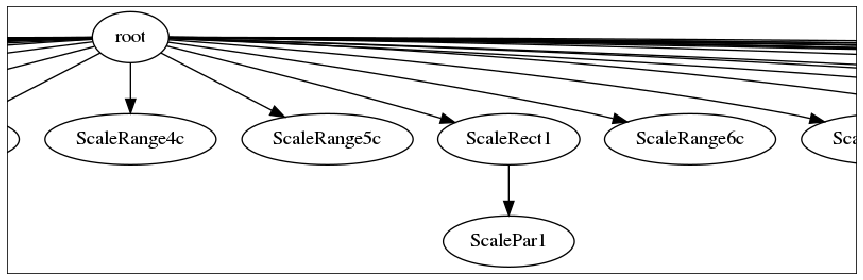

In [47]:
f = plt.figure(figsize=(16, 4))
ax = f.subplots(1)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.imshow(img[:, 3100:3900], aspect='equal', interpolation='nearest')
plt.tight_layout()
plt.show()

#### Get results from a single gate using its ID

In [48]:
gs_results = g_strat.gate_sample(sample, gate_id='And1')

In [49]:
gs_results.keys()

dict_keys(['And1'])

In [50]:
for g_id, res in gs_results.items():
    print(g_id, res.sum())

And1 561


#### Or, multiple gates using a list of IDs

In [51]:
gs_results = g_strat.gate_sample(sample, gate_id=['And1', 'Polygon2'])

In [52]:
gs_results.keys()

dict_keys(['And1', 'Polygon2'])

In [53]:
for g_id, res in gs_results.items():
    print(g_id, res.sum())

And1 561
Polygon2 183


#### All the gates are evaluated if no gate IDs are given

In [54]:
gs_results = g_strat.gate_sample(sample)

In [55]:
gs_results.keys()

dict_keys(['Range1', 'Rectangle1', 'Rectangle2', 'Range2', 'RatRange1', 'RatRange2', 'RatRange1a', 'Rectangle3', 'Rectangle4', 'Rectangle5', 'ScaleRange1', 'ScaleRange2', 'ScaleRange3', 'ScaleRange4', 'ScaleRange5', 'ScaleRange6', 'ScaleRange1c', 'ScaleRange2c', 'ScaleRange3c', 'ScaleRange4c', 'ScaleRange5c', 'ScaleRect1', 'ScalePar1', 'ScaleRange6c', 'ScaleRange7c', 'ScaleRange8c', 'Polygon1', 'Polygon2', 'Polygon3NS', 'Polygon4', 'Ellipse1', 'Quadrant1', 'Quadrant2', 'And1', 'And2', 'Or1', 'And3', 'Not1', 'And4', 'Or2', 'ParAnd2', 'ParAnd3'])

In [56]:
for g_id, res in gs_results.items():
    if isinstance(res, dict):
        print(g_id + ':')
        for sub_g_id, sub_res in res.items():
            print('\t', sub_g_id, sub_res.sum())
    else:
        print(g_id, res.sum())

Range1 440
Rectangle1 252
Rectangle2 252
Range2 4710
RatRange1 7679
RatRange2 3398
RatRange1a 7865
Rectangle3 6446
Rectangle4 1275
Rectangle5 1303
ScaleRange1 8425
ScaleRange2 850
ScaleRange3 3181
ScaleRange4 2509
ScaleRange5 1840
ScaleRange6 8351
ScaleRange1c 6916
ScaleRange2c 789
ScaleRange3c 2309
ScaleRange4c 1873
ScaleRange5c 1436
ScaleRect1 809
ScalePar1 558
ScaleRange6c 4113
ScaleRange7c 12478
ScaleRange8c 6263
Polygon1 1582
Polygon2 183
Polygon3NS 1325
Polygon4 716
Ellipse1 203
Quadrant1:
	 FL2P-FL4P 620
	 FL2N-FL4P 238
	 FL2N-FL4N 5148
	 FL2P-FL4N 7361
Quadrant2:
	 FSCN-SSCN 398
	 FSCD-SSCN-FL1N 755
	 FSCP-SSCN-FL1N 96
	 FSCD-FL1P 2978
	 FSCN-SSCP-FL1P 59
And1 561
And2 12
Or1 1983
And3 120
Not1 13164
And4 120
Or2 8283
ParAnd2 12
ParAnd3 120
